# Ch11. 온라인 쇼핑몰 데이터 요약하기

## 1. 시계열 데이터란?

**시계열 데이터**
- 날짜와 시간에 관련된 데이터
- 판다스는 시계열 데이터를 다루는 것에 장점이 있다

**판다스의 세가지 시계열 데이터**

<img src=https://i.ibb.co/Kyt6ncD/11-01.png, width=600>

**시계열 데이터에서 Timestamp가 가장 중요한 이유**

<img src=https://i.ibb.co/crRJnCN/11-02.png, width=600>


**Timestamp(datetime)에서 배워야할 것**

- datetime으로 변환(to_datetime)
- 주기
- DatetimeIndex 생성(date_tange)
- dt 접근자
- 그룹집계(resample)

## 2. 시계열 데이터로 변환하기(to_datetime)

> pandas to_datetime

자료형을 datetime으로 바꿔주는 함수

<br><br>

인자(parameter)

**arg** (datetime으로 변환 가능한 데이터)

datetime으로 변환할 데이터

 

**errors** (인수는 ‘ignore’, ‘raise’, ‘coerce’ / 기본값 ‘raise’)

에러 처리 방식

- 'raise' : 변환할 수 없는 객체를 만나면 에러를 일으킨다
 
- 'coerce' : 변환할 수 없는 객체를 만나면 해당 부분만 NaT으로 바꾸고 변환을 수행한다.
- 'ignore' :  변환할 수 없는 객체를 만나면 모두 변환하지 않고 그냥 input을 그대로 반환한다
  

**format** (str, 기본값 None)

문자열이 어떤 날짜형을 나타내는지 형식을 지정할 수 있다

예) 2023년 1월 3일이 '03/01/2023'으로 표현되어 있는 데이터라면 '%d/%m/%Y'로 표현한다

 

**unit** (str, 기본값은 'ns')

Timestamp가 숫자로 주어질 때 숫자의 기본단위. 기본값은 nano second

 

**origin** (scalar, 기본값 'unix')

Timestamp가 숫자로 주어질 때 기준 날짜. unit에서 정한 단위만큼의 숫자를 기준 날짜에서 더한다

예) origin으로 1970-01-01을 기준으로 정하고 unit가 D라면 숫자1은 기준열부터 1일 지난 후인 1970-01-02를 의미한다  


- 'unix' (or POSIX) : origin 은 1970-01-01.
- 'julian' : BC 4713년 1월 1일 정오. unit는 'D'여야 한다
- Timestamp 로 변환가능한 문자열을 넣어도 된다

<br><br>
to_datetime 함수 설명 : https://kimpanda.tistory.com/105

to_datetime 판다스 공식 문서 : https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

**Timestamp와 datetime은 어떤 차이가 있나요?**

1640962800 → 숫자로 나타낸 Timestamp

2022-01-01 00:00:00 → datetime으로 나타낸 Timestamp

날짜형식 Timestamp의  자료형이 datetime이다

→ 숫자를 다루기 위한 단원은 아니기에 이번 단원의 Timestamp는 datetime이다 

In [ ]:
# 실습 준비코드
import pandas as pd
data = [['2023-01-01', 10], ['2023-01-02', 50], ['2023-02-02', 20], 
        ['2023-Feb-03', 30], ['2023-Feb-04', 30], ['2023/Mar/01', 30]]
df = pd.DataFrame(data, columns=['날짜', '판매량'])
df

,날짜,판매량
0,2023-01-01,10
1,2023-01-02,50
2,2023-02-02,20
3,2023-Feb-03,30
4,2023-Feb-04,30
5,2023/Mar/01,30


In [ ]:
# to_datetime 함수로 timestamp로 변경하기
pd.to_datetime(df['날짜'])

0   2023-01-01
1   2023-01-02
2   2023-02-02
3   2023-02-03
4   2023-02-04
5   2023-03-01
Name: 날짜, dtype: datetime64[ns]

In [ ]:
# astype 함수로 timestamp로 변경하기 (잘 쓰지 않는다)
df['날짜'].astype('datetime64[ns]')

0   2023-01-01
1   2023-01-02
2   2023-02-02
3   2023-02-03
4   2023-02-04
5   2023-03-01
Name: 날짜, dtype: datetime64[ns]

In [ ]:
# to_datetime 함수의 장점 (바꿀 수 없는 데이터는 NaT로 바꾼다)
s = pd.Series(['2022-01/03', '김판다'])
pd.to_datetime(s, errors='coerce')

0   2022-01-03
1          NaT
dtype: datetime64[ns]

**시계열 데이터의 인덱싱과 슬라이싱(DatetimeIndex로 만들어야 한다)**

In [ ]:
# df를 복제한 df1으로 날짜열을 datetime으로 바꾸자
df1 = df.copy()
df1['날짜'] = pd.to_datetime(df1['날짜'])

In [ ]:
# 자료형을 바꾼 날짜열을 index로 지정
df1 = df1.set_index('날짜')
df1

,판매량
날짜,
2023-01-01,10
2023-01-02,50
2023-02-02,20
2023-02-03,30
2023-02-04,30
2023-03-01,30


In [ ]:
# 2023-02의 자료만 가져오기
df1.loc['2023-02'] # 단수의 문자열이라 df1['2023-02']을 사용하는 것보다 loc사용

,판매량
날짜,
2023-01-01,10
2023-01-02,50


In [ ]:
# 2023-02 부터 자료를 슬라이싱해서 가져오기
df1.loc['2023-02':]

,판매량
날짜,
2023-02-02,20
2023-02-03,30
2023-02-04,30
2023-03-01,30


**파일에서 데이터 프레임을 불러올 때 datetime 자료형으로 지정하기**

`read_csv`나 `read_excel`의 parse_dates 인자에 해당 열을 리스트로 입력한다(단독이어도 리스트로 입력)


예) 시간열을 datetime 자료형으로 불러올 경우

```python
parse_dates=['시간']
```




<br><br>



**프로젝트 데이터**

온라인 쇼핑몰 데이터 : https://raw.githubusercontent.com/panda-kim/csv_files/main/shop_data.csv



In [ ]:
# 프로젝트 코드
import pandas as pd
pd.options.display.max_rows = 6 # 판다스 1.4+ 에서 6행까지만 출력
url = 'https://raw.githubusercontent.com/panda-kim/csv_files/main/shop_data.csv'

In [ ]:
# csv파일에서 부를때 datetime으로 지정하고 index로 지정하기
df_ex1 = pd.read_csv(url, parse_dates=['시간'], index_col=0)
df_ex1

,유저코드,카테고리,제품코드,가격,행동
시간,,,,,
2022-06-01 00:00:01,u514028527,패션,p1307115,411.59,V
2022-06-01 00:00:13,u550193582,화장품,p12705151,51.22,V
2022-06-01 00:00:13,u551977964,식품,p4100249,583.80,V
...,...,...,...,...,...
2022-06-07 23:59:47,u566067205,인테리어,p16300035,31.92,V
2022-06-07 23:59:56,u553835872,가전,p1005192,205.67,V
2022-06-07 23:59:59,u518620512,식품,p3600661,306.05,V


In [ ]:
# 2022년 6월 1일 데이터만 인덱싱
df_ex1.loc['2022-06-01']

,유저코드,카테고리,제품코드,가격,행동
시간,,,,,
2022-06-01 00:00:01,u514028527,패션,p1307115,411.59,V
2022-06-01 00:00:13,u550193582,화장품,p12705151,51.22,V
2022-06-01 00:00:13,u551977964,식품,p4100249,583.80,V
...,...,...,...,...,...
2022-06-01 23:59:45,u566215254,화장품,p1004341,199.84,V
2022-06-01 23:59:47,u512604876,컴퓨터,p11600330,23.14,V
2022-06-01 23:59:56,u533241399,식품,p1004386,776.08,V


In [ ]:
# 2022년 6월 1일 23시의 데이터만 인덱싱
df_ex1.loc['2022-06-01 23']

,유저코드,카테고리,제품코드,가격,행동
시간,,,,,
2022-06-01 23:00:01,u512686201,컴퓨터,p1005073,1133.09,V
2022-06-01 23:00:01,u546852746,식품,p15100148,378.36,V
2022-06-01 23:00:05,u545634079,화장품,p1005235,437.51,V
...,...,...,...,...,...
2022-06-01 23:59:45,u566215254,화장품,p1004341,199.84,V
2022-06-01 23:59:47,u512604876,컴퓨터,p11600330,23.14,V
2022-06-01 23:59:56,u533241399,식품,p1004386,776.08,V


In [ ]:
# 2022년 6월 1일 23시 00분의 데이터만 인덱싱
df_ex1.loc['2022-06-01 23:00']

,유저코드,카테고리,제품코드,가격,행동
시간,,,,,
2022-06-01 23:00:01,u512686201,컴퓨터,p1005073,1133.09,V
2022-06-01 23:00:01,u546852746,식품,p15100148,378.36,V
2022-06-01 23:00:05,u545634079,화장품,p1005235,437.51,V
...,...,...,...,...,...
2022-06-01 23:00:52,u538139300,식품,p12708848,128.70,V
2022-06-01 23:00:54,u513346578,식품,p14700312,317.61,V
2022-06-01 23:00:54,u561817477,식품,p10800025,54.00,V


In [ ]:
# 2022-06-02 부터 2022-06-04까지 슬라이싱
df_ex1.loc['2022-06-02':'2022-06-04']

,유저코드,카테고리,제품코드,가격,행동
시간,,,,,
2022-06-02 00:00:02,u566601875,인테리어,p54900002,46.33,V
2022-06-02 00:00:10,u513357826,식품,p1701432,483.90,V
2022-06-02 00:00:19,u518692140,자동차,p1306586,630.39,V
...,...,...,...,...,...
2022-06-04 23:59:31,u567495419,인테리어,p1005233,149.04,V
2022-06-04 23:59:35,u515005323,식품,p2501674,59.18,V
2022-06-04 23:59:44,u557663879,식품,p1005008,84.69,V


## 3. 시계열 배열 생성(date_range)과 주기


> pandas date_range

특정 주기의 DatetimeIndex를 만드는 함수
 

**start**

배열의 시작

**end**

배열의 끝

**periods** (int, optional)

생성할 배열의 숫자
 
**freq** (주기 / 기본값 ‘D’)

생성할 데이터의 주기

In [ ]:
# 실습 준비 코드
import pandas as pd

In [ ]:
# 시작일과 끝일 사이의 모든 날짜
pd.date_range('2022-01-03', '2022-01-10')

DatetimeIndex(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-08', '2022-01-09', '2022-01-10'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# 시작일부터 지정된 개수의 배열 (날짜)
pd.date_range('2022-01-03', periods=3)

DatetimeIndex(['2022-01-03', '2022-01-04', '2022-01-05'], dtype='datetime64[ns]', freq='D')

In [ ]:
# 결과가 index인 시리즈 만들기
idx = pd.date_range('2022-01-03', periods=3)
pd.Series([0, 1, 2], index=idx)

2022-01-03    0
2022-01-04    1
2022-01-05    2
Freq: D, dtype: int64

In [ ]:
# DatetimeIndex이지만 시리즈로 만들 수 있고 데이터프레임의 열로 만들 수도 있다
pd.Series(pd.date_range('2022-01-03', periods=3))

0   2022-01-03
1   2022-01-04
2   2022-01-05
dtype: datetime64[ns]

**주기**

<img src=https://i.ibb.co/44LnkqM/image.jpg, width=600>

- 이 외의 주기가 필요하면 링크를 참조 :

 https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases

In [ ]:
# 주기 바꾸기 (월의 마지막날)
pd.date_range('2022-01-03', periods=3, freq='M')

DatetimeIndex(['2022-01-31', '2022-02-28', '2022-03-31'], dtype='datetime64[ns]', freq='M')

In [ ]:
# 주기 바꾸기 (월의 첫날)
pd.date_range('2022-01-03', periods=3, freq='MS')

DatetimeIndex(['2022-02-01', '2022-03-01', '2022-04-01'], dtype='datetime64[ns]', freq='MS')

In [ ]:
# 주기 바꾸기 (2개월 주기의 마지막날)
pd.date_range('2022-01-03', periods=3, freq='2M')

DatetimeIndex(['2022-01-31', '2022-03-31', '2022-05-31'], dtype='datetime64[ns]', freq='2M')

In [ ]:
# 주기 바꾸기 (년도별 마지막날)
pd.date_range('2022-01-03', periods=3, freq='Y')

DatetimeIndex(['2022-12-31', '2023-12-31', '2024-12-31'], dtype='datetime64[ns]', freq='A-DEC')

In [ ]:
# 주기 바꾸기 (10분))
pd.date_range('2022-01-03', periods=10, freq='10T')

DatetimeIndex(['2022-01-03 00:00:00', '2022-01-03 00:10:00',
               '2022-01-03 00:20:00', '2022-01-03 00:30:00',
               '2022-01-03 00:40:00', '2022-01-03 00:50:00',
               '2022-01-03 01:00:00', '2022-01-03 01:10:00',
               '2022-01-03 01:20:00', '2022-01-03 01:30:00'],
              dtype='datetime64[ns]', freq='10T')

## 4. dt 접근자

dt 접근자와 사용해서 datetime의 특정 데이터를 가져오는 속성과 함수들

<img src=https://i.ibb.co/zr15b8r/dt.jpg, width=600>

In [ ]:
# 실습 준비 코드
import pandas as pd
idx = pd.date_range('2022-01-03', periods=6, freq='43D 9H 10T')
df1 = pd.DataFrame(idx, columns=['date'])
df2 = pd.DataFrame([20, 20, 30, 20, 40, 10], index=idx, columns=['sales'])

In [ ]:
# 실습에 쓰일 df1
df1

,date
0,2022-01-03 00:00:00
1,2022-02-15 09:10:00
2,2022-03-30 18:20:00
3,2022-05-13 03:30:00
4,2022-06-25 12:40:00
5,2022-08-07 21:50:00


In [ ]:
# df1의 date열의 날짜만 추출
df1['date'].dt.day

0     3
1    15
2    30
3    13
4    25
5     7
Name: date, dtype: int64

In [ ]:
df1['date'].dt.year # 연도
df1['date'].dt.quarter # 쿼터
df1['date'].dt.month # 월
df1['date'].dt.day # 일
df1['date'].dt.hour # 시각
df1['date'].dt.minute # 분
df1['date'].dt.second # 초

0    0
1    0
2    0
3    0
4    0
5    0
Name: date, dtype: int64

In [ ]:
# df1의 date열의 시간만 추출 (결과는 object)
df1['date'].dt.time

0    00:00:00
1    09:10:00
2    18:20:00
3    03:30:00
4    12:40:00
5    21:50:00
Name: date, dtype: object

In [ ]:
# df1의 date열의 날짜만 추출 (결과는 object)
df1['date'].dt.date

0    2022-01-03
1    2022-02-15
2    2022-03-30
3    2022-05-13
4    2022-06-25
5    2022-08-07
Name: date, dtype: object

In [ ]:
# 날짜만 표시 (datetime의 시간을 00:00:00으로 만든다)
df1['date'].dt.normalize()

0   2022-01-03
1   2022-02-14
2   2022-03-28
3   2022-05-10
4   2022-06-21
5   2022-08-02
Name: date, dtype: datetime64[ns]

In [ ]:
# 연도 주 날짜를 데이터 프레임으로(주로 주를 추출할 때 쓴다)
df1['date'].dt.isocalendar()

,year,week,day
0,2022,1,1
1,2022,7,1
2,2022,13,1
3,2022,19,2
4,2022,25,2
5,2022,31,2


In [ ]:
# 실습에 쓰일 df2
df2

,sales
2022-01-03 00:00:00,20
2022-02-15 09:10:00,20
2022-03-30 18:20:00,30
2022-05-13 03:30:00,20
2022-06-25 12:40:00,40
2022-08-07 21:50:00,10


In [ ]:
# df2의 index(DatetimeIndex)에서 연도만 추출 (dt접근자가 필요 없다)
df2.index.year

Int64Index([2022, 2022, 2022, 2022, 2022, 2022], dtype='int64')

**지시자 (directive)**

<img src=https://i.ibb.co/TBP9bPn/image.jpg, width=600>

- 더 많은 지시자를 알고 싶다면 링크를 참조 : 

 https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [ ]:
# 표기형식 바꾸기
df1['date'].dt.strftime('%y/%m/%d [%a]')

0    22/01/03 Mon
1    22/02/15 Tue
2    22/03/30 Wed
3    22/05/13 Fri
4    22/06/25 Sat
5    22/08/07 Sun
Name: date, dtype: object

In [ ]:
# 연도와 합쳐진 월의 데이터를 가져올 때도 strftime을 쓴다
df1['date'].dt.strftime('%Y-%m')

0    2022-01
1    2022-02
2    2022-03
3    2022-05
4    2022-06
5    2022-08
Name: date, dtype: object

In [ ]:
# 연도가 포함된 월을 얻고 싶다면 period 자료형을 사용하는 것이 더 정확하다
df1['date'].dt.to_period('M')

0    2022-01
1    2022-02
2    2022-03
3    2022-05
4    2022-06
5    2022-08
Name: date, dtype: period[M]

In [ ]:
# 연도가 포함된 쿼터를 얻을 경우도 시계열을 유지하려면 period 자료형을 쓴다
df1['date'].dt.to_period('Q')

0    2022Q1
1    2022Q1
2    2022Q1
3    2022Q2
4    2022Q2
5    2022Q3
Name: date, dtype: period[Q-DEC]

## 5. 시계열 데이터의 그룹집계(resample)

In [1]:
# 실습 준비 코드
import pandas as pd
idx = pd.date_range('2023-01-01', periods=6, freq='20D 9H 10T')
df1 = pd.DataFrame(idx, columns=['날짜'])
df1['금액'] = [10000, 20000, 20000, 20000, 30000, 10000]
df1['구분'] = ['입금', '입금', '출금', '입금', '입금', '출금']
df2 = df1.set_index('날짜')
df1

,날짜,금액,구분
0,2023-01-01 00:00:00,10000,입금
1,2023-01-21 09:10:00,20000,입금
2,2023-02-10 18:20:00,20000,출금
3,2023-03-03 03:30:00,20000,입금
4,2023-03-23 12:40:00,30000,입금
5,2023-04-12 21:50:00,10000,출금


만약 df1을 월별 집계를 한다면 df1의 날짜열에서 월의 데이터를 추출해
`groupby`를 사용할 수도 있을 것이다

In [ ]:
# df1을 복제한 df로 월별 정보를 담은 월 열을 만든다
df = df1.copy()
df['월'] = df['날짜'].dt.strftime('%Y-%m')
df

,날짜,금액,구분,월
0,2023-01-01 00:00:00,10000,입금,2023-01
1,2023-01-21 09:10:00,20000,입금,2023-01
2,2023-02-10 18:20:00,20000,출금,2023-02
3,2023-03-03 03:30:00,20000,입금,2023-03
4,2023-03-23 12:40:00,30000,입금,2023-03
5,2023-04-12 21:50:00,10000,출금,2023-04


In [ ]:
# groupby로 월별 금액을 집계한다
df.groupby('월')['금액'].sum()

월
2023-01    30000
2023-02    20000
2023-03    50000
2023-04    10000
Name: 금액, dtype: int64

In [ ]:
# groupby로 월과 구분으로 집계해 unstack으로 피벗테이블 처럼 만든다
df.groupby(['월', '구분'])['금액'].sum().unstack()

구분,입금,출금
월,,
2023-01,30000.0,NaN
2023-02,NaN,20000.0
2023-03,50000.0,NaN
2023-04,NaN,10000.0


위 방법이 일감으로 떠오르겠지만 판다스에서는 대부분 이런식의 그룹집계를 하지 않는다

> 판다스에는 그룹집계에 탁월한 `resample` 함수가 있기 때문

`groupby`자리에 `resample`을 사용하며 따로 열로 만들 것 없이 `resample`에 집계할 주기를 지정하면 된다



In [4]:
# 일자별 집계
df1.resample(rule='M', on='날짜')['금액'].sum()

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30'], dtype='datetime64[ns]', name='날짜', freq='M')

In [ ]:
# timestamp를 월의 첫날로 바꿔보자
df1.resample('MS', on='날짜')['금액'].sum()

날짜
2023-01-01    30000
2023-02-01    20000
2023-03-01    50000
2023-04-01    10000
Freq: MS, Name: 금액, dtype: int64

In [ ]:
# 시계열 resample과 groupby를 함께 사용할 때 (groupby부터 사용한다)
df1.groupby('구분').resample('M', on='날짜')['금액'].sum().unstack(level=0)

구분,입금,출금
날짜,,
2023-01-31,30000.0,NaN
2023-02-28,0.0,20000.0
2023-03-31,50000.0,0.0
2023-04-30,NaN,10000.0


In [ ]:
# 실습에 쓰일 df2는 DatetimeIndex이다
df2

,금액,구분
날짜,,
2023-01-01 00:00:00,10000,입금
2023-01-21 09:10:00,20000,입금
2023-02-10 18:20:00,20000,출금
2023-03-03 03:30:00,20000,입금
2023-03-23 12:40:00,30000,입금
2023-04-12 21:50:00,10000,출금


In [ ]:
# DatetimeIndex일 때는 on의 지정이 필요없다
df2.resample('MS')['금액'].sum()

날짜
2023-01-01    30000
2023-02-01    20000
2023-03-01    50000
2023-04-01    10000
Freq: MS, Name: 금액, dtype: int64

프로젝트의 그룹집계로 프로젝트를 마무리

온라인 쇼핑몰 데이터의 일자별 액션수를 집계해보자

In [ ]:
# 프로젝트 코드
import pandas as pd
pd.options.display.max_rows = 8 # 판다스 1.4+ 에서 8행까지만 출력
url = 'https://raw.githubusercontent.com/panda-kim/csv_files/main/shop_data.csv'
# csv파일에서 부를때 datetime으로 지정하고 index로 지정하기
df_ex1 = pd.read_csv(url, parse_dates=['시간'], index_col=0)
df_ex1

,유저코드,카테고리,제품코드,가격,행동
시간,,,,,
2022-06-01 00:00:01,u514028527,패션,p1307115,411.59,V
2022-06-01 00:00:13,u550193582,화장품,p12705151,51.22,V
2022-06-01 00:00:13,u551977964,식품,p4100249,583.80,V
2022-06-01 00:00:19,u542985695,식품,p12705928,139.58,V
...,...,...,...,...,...
2022-06-07 23:59:41,u548223253,식품,p4000169,102.94,V
2022-06-07 23:59:47,u566067205,인테리어,p16300035,31.92,V
2022-06-07 23:59:56,u553835872,가전,p1005192,205.67,V
2022-06-07 23:59:59,u518620512,식품,p3600661,306.05,V


In [ ]:
# 일자별 총 행동의 횟수 집계
df_ex1.resample('D')['가격'].count()

시간
2022-06-01    16974
2022-06-02    12815
2022-06-03    10063
2022-06-04     9892
2022-06-05     9285
2022-06-06     9141
2022-06-07    13263
Freq: D, Name: 가격, dtype: int64

<Axes: >

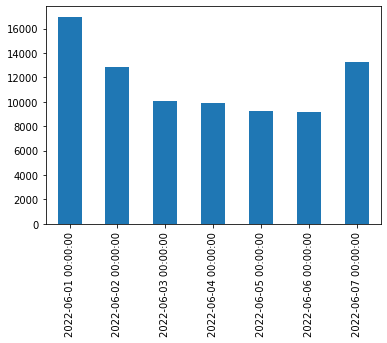

In [ ]:
# 간단하게 시각화
df_ex1.resample('D')['가격'].count().rename_axis('').plot(kind='bar')

프로젝트 데이터의 행동 유형

- V(view) : 페이지 보기
- C(cart) : 장바구니 담기
- B(buy) : 구매

유형별로 횟수를 집계해보자

In [ ]:
# 일자별 행동 유형별로 횟수를 집계
df_ex1.groupby('행동').resample('D')['가격'].count().unstack(level=0)

행동,B,C,V
시간,,,
2022-06-01,75,91,16808
2022-06-02,72,87,12656
2022-06-03,61,81,9921
2022-06-04,63,63,9766
2022-06-05,46,64,9175
2022-06-06,35,60,9046
2022-06-07,60,93,13110
